Daniel Schwartz, Rafael Bastidas, and Leo Tong

**Phase 4**



**Introduction**:

During the past year, equity markets have seen a strong boom. Led by big technology companies, their continued revenue and user growth have pushed the S&P 500 to new heights. This can be seen from the 2019 gains the SPY had, hovering over a gain of 10% year-over-year.  On the flip side, the retail industry has not been doing so well. As consumer trends have shifted away from the traditional brick-and-mortar stores into tough competition such as Amazon, it’s no secret that they were poised for diminished growth and increased obsolescence in years to come.

During March, many states locked-down in order to combat the pandemic which continued for many months. This has been seen to have saved thousands of lives but resulted in a serious economic downturn for the US economy, especially the consumer retail industry. As lockdowns kept customers at home and away from stores, valuations across the retail industry were slashed, revenues cut, and future guidance eliminated. For this project, we will be focusing on how the implications of the coronavirus pandemic vary across businesses within the consumer retail industry. The different businesses are grouped by small (<$500M), medium ($500M <X< $1B), and large cap valuations (>$1B). We suspected that small and medium cap companies performed especially poorly in comparison to large cap companies and have had a diminished recovery in both profitability and valuation.

In order to begin our analysis, we decided to use iexcloud, a financial data API to collect all of the data.  In our analysis, we focused on how companies' valuations and earnings have changed in relation to the general market's performance. This will give us an understanding of how different sized companies' valuation and earnings have changed as a result of the coronavirus while holding general market performance constant. We created a multi-linear regression model using different metrics of P/E in comparison to different beta periods (3-month, 6-month) to look at the relationship between earnings at different beta periods. We also used a regression model for the companies’ market cap to their own  beta at different  periods to see the changes to valuation per market cap.


**Data Description**: 

Our dataset was created by making requests to an API called Iexcloud that contains financial information. Each observation in our dataset is a retail company that is publicly traded on the Americans markets, and each column is a common financial statistic such as percent change over various periods of time, market capitalization, and number of employees. We personally funded the creation of this dataset by signing up for a subscription to the API, which has a limited number of requests and is why our API key is hidden. Much of the data in this dataset is public information that has been compiled for the ease of financial analysis. By using this API to gain information about these American companies, we can cover a lot of important information on stock performance over the past year. We think that variety of the companies in the set, with their various market capitalizations, earnings, and business models, enable us to better understand and contextualize the purpose of our anaylsis, the economic implications of the coronavirus on the retail trade industry.

The link to our csv file can be found here: https://cornell.box.com/s/ldm6zp580cetvnisgtlcx8dtkv8ko0hd 


**Preregistration**:



Analysis 1: Mkt cap and beta

In this analysis, we will be focusing on proving that small and medium sized companies have had the toughest time recovering and that our economy is at level below than what the SPY suggests. We will be looking at the valuation of a company vs how it has been performing in proportion to the market. We expect to find that larger companies have been closer to a beta of 1 and smaller companies to be at a smaller number. We don't expect the beta to reach over 1 since the industry has had difficulty recovering in the midst of changing consumer trends. For this analysis, we will complete similar summary statistics and data analysis as we attempt to determine the linear relationship between these variables. We will start by looking at the distributions of both of these variables independently through the usage of summary statistics such as mean, median, first quartile, third quartile, variance, and a scatterplot visualiziation. For our data analysis, we will calculate the covariance, and correlation coefficients between these two variables, by first separating the companies into buckets based on their market cap (<500m, 500m-1.5b, >1.5b), and then creating regression models for these variables for each container. This will yield us three different correlation coefficients, one for each bucket. Finally, to determine significance we will conduct a hypothesis test for correlation.



Analysis 2: 

EBITDA/Enterprise value and month6percentchange (mkt cap containers already made)

P/E ratio and month6percentagechange

P/E ratio and beta

EBITDA/ Enterprisevalue and beta

For this analysis, we are going to be looking at the share price change within the last 6 month vs a company's P/E ratio. We hope to find a positive correlation on average across the board as the market has been recovering since the March lows and P/E ratios have been seen to be increasing as more companies within the consumer retail industry stabilize their revenue streams. We do expect that the P/E ratio will be lower in our dataset since we are looking at the consumer retail, a heavily impacted industry. The positive correlation will appear lower for smaller market cap companies as small and mid size companies have been especially hit and draw little excitement in the recovery of the market. We are going to be seeing the earnings multiple be at a premium for larger cap companies. We will once again determine the mean, median, first quartile, third quartile, variance and scatterplot visualizations for each variable independently. However, we will now view these 4 relationships to get a strong idea for the spread. For each relationship, we will determine the covariance, correlation coefficient and conduct correlation hypothesis tests to determine the significance of each relationship. Also we will still use these buckets of market cap, so we will get 3 different correlation coefficients for each, one for each bucket. Finally, we will use these four variables to create a multiple variable linear regression with the dependent variable being the profitability of a company, which will create a strong model for determining the profitability of a company. 


**First Data Analysis**

First we will load the required libraries

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Next, let's load the csv file from our Data Collection and Cleaning Section

In [3]:
initial_df = pd.read_csv("CleanRetailData.csv")

In [4]:
initial_df.head()

,Unnamed: 0,week52change,week52high,week52low,marketcap,employees,day200MovingAvg,day50MovingAvg,float,avg10Volume,...,profitMargin,enterpriseValue,enterpriseValueToRevenue,priceToSales,priceToBook,forwardPERatio,pegRatio,peHigh,peLow,putCallRatio
0,0,3.128440,4.7300,0.9000,2.327152e+08,1638.0,2.2500,3.4400,29647613.0,280618.0,...,-0.013113,4.446762e+08,1.31,0.68,1.777823,90.00,2.38,3.408324e+17,6.485183e+16,NaN
1,1,-0.225604,0.4066,0.1205,7.109556e+07,89000.0,0.1895,0.1920,378608931.0,221569.9,...,-0.022931,4.112863e+09,0.25,0.00,-0.019096,-0.05,NaN,-5.183781e-01,-2.863244e-02,NaN
2,2,-0.351852,0.2500,0.1750,2.562788e+08,1162.0,0.2221,0.2185,367111255.0,NaN,...,-0.069362,3.834237e+08,2.20,1.43,0.198820,NaN,NaN,NaN,NaN,NaN
3,3,-0.039171,23.7000,8.9000,5.484073e+09,NaN,14.0100,17.3400,223211483.0,150.0,...,-0.094302,5.647220e+09,1.70,1.65,3.211487,NaN,NaN,NaN,NaN,NaN
4,4,-0.488636,0.2880,0.0160,1.042875e+06,NaN,0.1001,0.0638,9453697.0,200.1,...,NaN,1.152884e+06,NaN,NaN,-0.378211,NaN,NaN,NaN,NaN,NaN


In [5]:

print("Our initial dataframe contains " + str(len(initial_df.index)) + " companies")

Our initial dataframe contains 857 companies


For our first analysis, we will begin by finding some of the summary statistics for market capitalization, beta, and price to book over beta.

In [6]:
first_adata = initial_df.dropna(subset=["marketcap", "beta", "priceToBook"])

print("The mean of the marketcap is ${0:.2f} billion".format(first_adata["marketcap"].mean()/1000000000))
print("The median of the marketcap is ${0:.2f} billion".format(first_adata["marketcap"].median()/1000000000))
print("The standard deviation of the marketcap is ${0:.2f} billion".format(first_adata["marketcap"].std()/1000000000))

The mean of the marketcap is $13.35 billion
The median of the marketcap is $1.04 billion
The standard deviation of the marketcap is $83.40 billion


In [7]:
print("The mean of beta is {0:.4f}".format(first_adata["beta"].mean()))
print("The median of beta is {0:.4f}".format(first_adata["beta"].median()))
print("The standard deviation of beta is {0:.4f}".format(first_adata["beta"].std()))

The mean of beta is 2.6879
The median of beta is 0.3236
The standard deviation of beta is 50.9055


In [8]:
print("Our dataframe for our first analysis contains " + str(len(first_adata.index)) + " companies")

Our dataframe for our first analysis contains 554 companies


To determine the relationship between market capitalization and beta, we will separate the companies into different buckets based on their market capitialization. The first bucket will have companies with values less than 500 million, the second bucket will have values between 500 million and 1.5 billion, and the last bucket will consist of companies over 1.5 billion. Then we will create linear models for each bucket, and the general group, to find 4 different linear relationships. 

In [9]:
temp_bucket = first_adata[first_adata["marketcap"]<= 1500000000]
first_bucket = temp_bucket[temp_bucket["marketcap"]< 500000000]
second_bucket = temp_bucket[temp_bucket["marketcap"] >= 500000000]
third_bucket = first_adata[first_adata["marketcap"]> 1500000000]

In [10]:
print("The mean of the marketcap for the first bucket is ${0:.2f} million".format(first_bucket["marketcap"].mean()/1000000))
print("The median of the marketcap for the first bucket is ${0:.2f} million".format(first_bucket["marketcap"].median()/1000000))
print("The standard deviation of the marketcap for the first bucket is ${0:.2f} million".format(first_bucket["marketcap"].std()/1000000))
print("Our dataframe for our first bucket contains " + str(len(first_bucket.index)) + " companies")

The mean of the marketcap for the first bucket is $98.27 million
The median of the marketcap for the first bucket is $20.21 million
The standard deviation of the marketcap for the first bucket is $137.07 million
Our dataframe for our first bucket contains 235 companies


In [11]:
print("The mean of the marketcap for the second bucket is ${0:.2f} billion".format(second_bucket["marketcap"].mean()/1000000000))
print("The median of the marketcap for the second bucket is ${0:.2f} billion".format(second_bucket["marketcap"].median()/1000000000))
print("The standard deviation of the marketcap for the second bucket is ${0:.2f} billion".format(second_bucket["marketcap"].std()/1000000000))
print("Our dataframe for our second bucket contains " + str(len(second_bucket.index)) + " companies")

The mean of the marketcap for the second bucket is $0.95 billion
The median of the marketcap for the second bucket is $0.88 billion
The standard deviation of the marketcap for the second bucket is $0.31 billion
Our dataframe for our second bucket contains 70 companies


In [12]:
print("The mean of the marketcap for the third bucket is ${0:.2f} billion".format(third_bucket["marketcap"].mean()/1000000000))
print("The median of the marketcap for the third bucket is ${0:.2f} billion".format(third_bucket["marketcap"].median()/1000000000))
print("The standard deviation of the marketcap for the third bucket is ${0:.2f} billion".format(third_bucket["marketcap"].std()/1000000000))
print("Our dataframe for our third bucket contains " + str(len(third_bucket.index)) + " companies")

The mean of the marketcap for the third bucket is $29.35 billion
The median of the marketcap for the third bucket is $6.58 billion
The standard deviation of the marketcap for the third bucket is $122.65 billion
Our dataframe for our third bucket contains 249 companies


Before we continue, we should be sure to check the shape of our data, and remove outliers that could ruin our computation of the correlation coefficient.

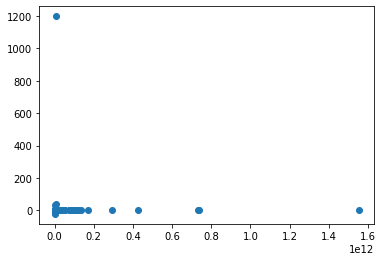

In [13]:
plt.scatter(first_adata["marketcap"], first_adata["beta"])


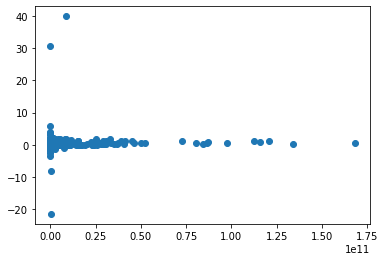

In [14]:
first_adata_removed = first_adata[first_adata["marketcap"]<= (first_adata["marketcap"].median() + 3 * first_adata["marketcap"].std())]
first_adata_removed = first_adata_removed[first_adata_removed["marketcap"]>= (first_adata["marketcap"].median() - 3 * first_adata["marketcap"].std())]
first_adata_removed = first_adata_removed[first_adata_removed["beta"]<= (first_adata["beta"].median() + 3 * first_adata["beta"].std())]
first_adata_removed = first_adata_removed[first_adata_removed["beta"]>= (first_adata["beta"].median() - 3 * first_adata["beta"].std())]

plt.scatter(first_adata_removed["marketcap"], first_adata_removed["beta"])



In [15]:
print("Our dataframe for our general bucket contains " + str(len(first_adata_removed.index)) + " companies")

Our dataframe for our general bucket contains 548 companies


In [16]:
first_bucket_removed = first_bucket[first_bucket["marketcap"]>= (first_bucket["marketcap"].median() - 3 * first_bucket["marketcap"].std())]
first_bucket_removed = first_bucket_removed[first_bucket_removed["beta"]<= (first_bucket["beta"].median() + 3 * first_bucket["beta"].std())]
first_bucket_removed = first_bucket_removed[first_bucket_removed["beta"]>= (first_bucket["beta"].median() - 3 * first_bucket["beta"].std())]

second_bucket_removed = second_bucket[second_bucket["beta"]<= (second_bucket["beta"].median() + 3 * second_bucket["beta"].std())]
second_bucket_removed = second_bucket_removed[second_bucket_removed["beta"]>= (second_bucket["beta"].median() - 3 * second_bucket["beta"].std())]

third_bucket_removed = third_bucket[third_bucket["marketcap"]<= (third_bucket["marketcap"].median() + 3 * third_bucket["marketcap"].std())]

third_bucket_removed = third_bucket_removed[third_bucket_removed["beta"]<= (third_bucket["beta"].median() + 3 * third_bucket["beta"].std())]
third_bucket_removed = third_bucket_removed[third_bucket_removed["beta"]>= (third_bucket["beta"].median() - 3 * third_bucket["beta"].std())]

print("Our dataframe for our first bucket contains " + str(len(first_bucket_removed.index)) + " companies")
print("Our dataframe for our second bucket contains " + str(len(second_bucket_removed.index)) + " companies")
print("Our dataframe for our third bucket contains " + str(len(third_bucket_removed.index)) + " companies")



Our dataframe for our first bucket contains 232 companies
Our dataframe for our second bucket contains 70 companies
Our dataframe for our third bucket contains 244 companies


Even after filtering out some of our outliers, some beta values are still far outside of the range of the typical beta value, so we decided to remove all observations with beta values outside of the range from -3, to 3.

In [17]:
first_adata_removed = first_adata_removed[first_adata_removed["beta"]<= 3]
first_adata_removed = first_adata_removed[first_adata_removed["beta"] >= -3]

first_bucket_removed = first_bucket_removed[first_bucket_removed["beta"]<= 3]
first_bucket_removed = first_bucket_removed[first_bucket_removed["beta"] >= -3]

second_bucket_removed = second_bucket_removed[second_bucket_removed["beta"]<= 3]
second_bucket_removed = second_bucket_removed[second_bucket_removed["beta"] >= -3]

third_bucket_removed = third_bucket_removed[third_bucket_removed["beta"]<= 3]
third_bucket_removed = third_bucket_removed[third_bucket_removed["beta"] >= -3]


print("Our dataframe for our general bucket contains " + str(len(first_adata_removed.index)) + " companies")
print("Our dataframe for our first bucket contains " + str(len(first_bucket_removed.index)) + " companies")
print("Our dataframe for our second bucket contains " + str(len(second_bucket_removed.index)) + " companies")
print("Our dataframe for our third bucket contains " + str(len(third_bucket_removed.index)) + " companies")



Our dataframe for our general bucket contains 540 companies
Our dataframe for our first bucket contains 228 companies
Our dataframe for our second bucket contains 70 companies
Our dataframe for our third bucket contains 243 companies


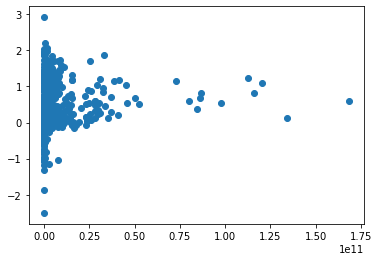

In [18]:
plt.scatter(first_adata_removed["marketcap"], first_adata_removed["beta"])


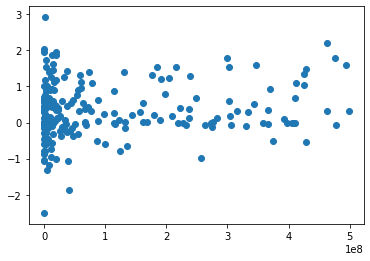

In [19]:
plt.scatter(first_bucket_removed["marketcap"], first_bucket_removed["beta"])


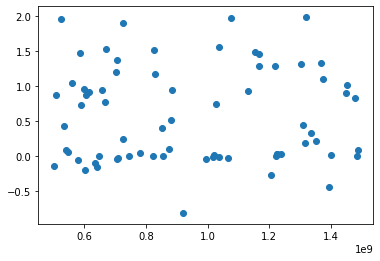

In [20]:
plt.scatter(second_bucket_removed["marketcap"], second_bucket_removed["beta"])


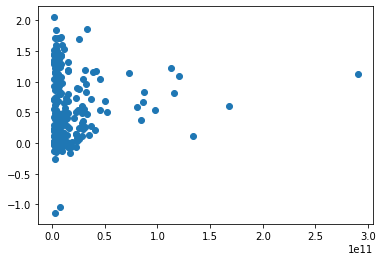

In [21]:
plt.scatter(third_bucket_removed["marketcap"], third_bucket_removed["beta"])


Now that we have filtered out the outliers for each bucket, lets model the linear relationship between beta and market cap on our buckets.

In [60]:
model_general = LinearRegression().fit(first_adata[["marketcap"]],first_adata["beta"])
model_first = LinearRegression().fit(first_bucket[["marketcap"]],first_bucket["beta"])
model_second = LinearRegression().fit(second_bucket[["marketcap"]],second_bucket["beta"])
model_third = LinearRegression().fit(third_bucket[["marketcap"]],third_bucket["beta"])
print("The correlation coefficient of the marketcap and beta for the first bucket is {0:.5f}".format(model_first.coef_[0]))
print("The correlation coefficient of the marketcap and beta for the second bucket is {0:.5f}".format(model_second.coef_[0]))
print("The correlation coefficient of the marketcap and beta for the third bucket is {0:.5f}".format(model_third.coef_[0]))
print("The correlation coefficient of the marketcap and beta for the general bucket is {0:.5f}".format(model_general.coef_[0]))
print()
modelmbg_r_2 = model_general.score(first_adata[["marketcap"]],first_adata["beta"])
modelmbf_r_2 = model_first.score(first_bucket[["marketcap"]],first_bucket["beta"])
modelmbs_r_2 = model_second.score(second_bucket[["marketcap"]],second_bucket["beta"])
modelmbt_r_2 = model_third.score(third_bucket[["marketcap"]],third_bucket["beta"])
print("The first model has a R-squared of {0:.4f}".format(modelmbf_r_2)) 
print("The second model has a R-squared of {0:.4f}".format(modelmbs_r_2)) 
print("The third model has a R-squared of {0:.4f}".format(modelmbt_r_2)) 
print("The general model has a R-squared of {0:.4f}".format(modelmbg_r_2)) 

The correlation coefficient of the marketcap and beta for the first bucket is -0.00000
The correlation coefficient of the marketcap and beta for the second bucket is -0.00000
The correlation coefficient of the marketcap and beta for the third bucket is -0.00000
The correlation coefficient of the marketcap and beta for the general bucket is -0.00000

The first model has a R-squared of 0.0006
The second model has a R-squared of 0.0000
The third model has a R-squared of 0.0002
The general model has a R-squared of 0.0000


Well, it seems that there is not much of a correlation between market capitialization and beta. Let's do some brief summary statistics for price To Book.

In [36]:
print("The mean of the price to book for the general bucket is {0:.4f}".format(first_adata_removed["priceToBook"].mean()))
print("The median of the book for the general bucket is {0:.4f}".format(first_adata_removed["priceToBook"].median()))
print("The standard deviation of the book for the general bucket is {0:.4f}".format(first_adata_removed["priceToBook"].std()))
print()
print("The mean of the price to book  for the first bucket is {0:.4f}".format(first_bucket_removed["priceToBook"].mean()))
print("The median of the price to book  for the first bucket is {0:.4f}".format(first_bucket_removed["priceToBook"].median()))
print("The standard deviation of the price to book  for the first bucket is {0:.4f}".format(first_bucket_removed["priceToBook"].std()))
print()
print("The mean of the price to book for the second bucket is {0:.4f}".format(second_bucket_removed["priceToBook"].mean()))
print("The median of the price to book for the second bucket is {0:.4f}".format(second_bucket_removed["priceToBook"].median()))
print("The standard deviation of the price to book  for the second bucket is {0:.4f}".format(second_bucket_removed["priceToBook"].std()))
print()
print("The mean of the price to book  for the third bucket is {0:.4f}".format(third_bucket_removed["priceToBook"].mean()))
print("The median of the book  for the third bucket is {0:.4f}".format(third_bucket_removed["priceToBook"].median()))
print("The standard deviation of the book for the third bucket is {0:.4f}".format(third_bucket_removed["priceToBook"].std()))



The mean of the price to book for the general bucket is -195.1148
The median of the book for the general bucket is 1.5510
The standard deviation of the book for the general bucket is 3044.6948

The mean of the price to book  for the first bucket is -341.8310
The median of the price to book  for the first bucket is 0.4379
The standard deviation of the price to book  for the first bucket is 4423.1220

The mean of the price to book for the second bucket is -96.7684
The median of the price to book for the second bucket is 1.9367
The standard deviation of the price to book  for the second bucket is 673.4202

The mean of the price to book  for the third bucket is -85.3661
The median of the book  for the third bucket is 3.2695
The standard deviation of the book for the third bucket is 1459.9293


Let's take a look at the general distribution of these two varibles in a scatterplot.

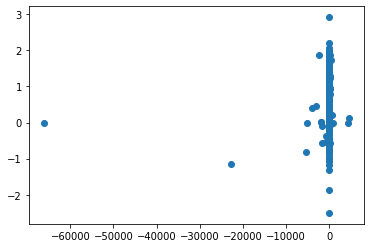

In [24]:
plt.scatter(first_adata_removed["priceToBook"], first_adata_removed["beta"])


Let's remove some outliers for price to book.

In [28]:
first_adata_pb = first_adata_removed[first_adata_removed["priceToBook"]>= (first_adata_removed["priceToBook"].median() -  500)]
first_adata_pb = first_adata_pb[first_adata_removed["priceToBook"]<= (first_adata_removed["priceToBook"].median() + 500)]


first_bucket_pb = first_bucket_removed[first_bucket_removed["priceToBook"]>= (first_bucket_removed["priceToBook"].median() -  500)]
first_bucket_pb = first_bucket_pb[first_bucket_pb["priceToBook"]<= (first_bucket_removed["priceToBook"].median() +  500)]

second_bucket_pb = second_bucket_removed[second_bucket_removed["priceToBook"]<= (second_bucket_removed["priceToBook"].median() +  500)]
second_bucket_pb = second_bucket_pb[second_bucket_pb["priceToBook"]>= (second_bucket_removed["priceToBook"].median() -  500)]

third_bucket_pb = third_bucket_removed[third_bucket_removed["priceToBook"]<= (third_bucket_removed["priceToBook"].median() +  500)]
third_bucket_pb = third_bucket_pb[third_bucket_removed["priceToBook"]>= (third_bucket_removed["priceToBook"].median() -  500)]

print("Our dataframe for our general bucket contains " + str(len(first_adata_pb.index)) + " companies")
print("Our dataframe for our first bucket contains " + str(len(first_bucket_pb.index)) + " companies")
print("Our dataframe for our second bucket contains " + str(len(second_bucket_pb.index)) + " companies")
print("Our dataframe for our third bucket contains " + str(len(third_bucket_pb.index)) + " companies")


Our dataframe for our general bucket contains 523 companies
Our dataframe for our first bucket contains 215 companies
Our dataframe for our second bucket contains 68 companies
Our dataframe for our third bucket contains 241 companies


/Users/dan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/dan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


Now after removing the outliers.

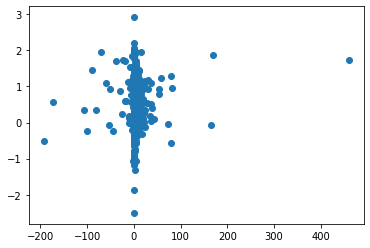

In [29]:
plt.scatter(first_adata_pb["priceToBook"], first_adata_pb["beta"])


In [63]:
model_general = LinearRegression().fit(first_adata_pb[["priceToBook"]],first_adata_pb["beta"])
model_first = LinearRegression().fit(first_bucket_pb[["priceToBook"]],first_bucket_pb["beta"])
model_second = LinearRegression().fit(second_bucket_pb[["priceToBook"]],second_bucket_pb["beta"])
model_third = LinearRegression().fit(third_bucket_pb[["priceToBook"]],third_bucket_pb["beta"])
print("The correlation coefficient of the price to book and beta for the first bucket is {0:.5f}".format(model_first.coef_[0]))
print("The correlation coefficient of the price to book and beta for the second bucket is {0:.5f}".format(model_second.coef_[0]))
print("The correlation coefficient of the price to book and beta for the third bucket is {0:.5f}".format(model_third.coef_[0]))
print("The correlation coefficient of the price to book and beta for the general bucket is {0:.5f}".format(model_general.coef_[0]))

modelpbg_r_2 = model_general.score(first_adata_pb[["priceToBook"]],first_adata_pb["beta"])
modelpbf_r_2 = model_first.score(first_bucket_pb[["priceToBook"]],first_bucket_pb["beta"])
modelpbs_r_2 = model_second.score(second_bucket_pb[["priceToBook"]],second_bucket_pb["beta"])
modelpbt_r_2 = model_third.score(third_bucket_pb[["priceToBook"]],third_bucket_pb["beta"])
print("The first model has a R-squared of {0:.4f}".format(modelpbf_r_2)) 
print("The second model has a R-squared of {0:.4f}".format(modelpbs_r_2)) 
print("The third model has a R-squared of {0:.4f}".format(modelpbt_r_2)) 
print("The general model has a R-squared of {0:.4f}".format(modelpbg_r_2)) 



The correlation coefficient of the price to book and beta for the first bucket is -0.00025
The correlation coefficient of the price to book and beta for the second bucket is 0.00059
The correlation coefficient of the price to book and beta for the third bucket is 0.00168
The correlation coefficient of the price to book and beta for the general bucket is 0.00182
The first model has a R-squared of 0.0001
The second model has a R-squared of 0.0002
The third model has a R-squared of 0.0130
The general model has a R-squared of 0.0064


**Analysis 2**

For this analysis we are going to be creating a multivariable regression with PE ratio as the dependent variable, and Enterprise Value to Revenue, and Enterprise Value/ EBITDA while still using our buckets from Anaylsis 1. We will start by droping NA values.

In [39]:
second_adata = first_adata_pb.dropna(subset=["peRatio", "enterpriseValue", "enterpriseValueToRevenue", "EBITDA"])
first_bucket2 = first_bucket_pb.dropna(subset=["peRatio","enterpriseValue", "enterpriseValueToRevenue", "EBITDA"])
second_bucket2 = second_bucket_pb.dropna(subset=["peRatio","enterpriseValue", "enterpriseValueToRevenue", "EBITDA"])
third_bucket2 = third_bucket_pb.dropna(subset=["peRatio","enterpriseValue", "enterpriseValueToRevenue", "EBITDA"])

Once again, let's look at summary statistics for the variables we are looking into.

In [37]:
print("The mean of the pe Ratio for the general bucket is {0:.4f}".format(second_adata["peRatio"].mean()))
print("The median of the pe Ratio for the general bucket is {0:.4f}".format(second_adata["peRatio"].median()))
print("The standard deviation of the pe Ratio for the general bucket is {0:.4f}".format(second_adata["peRatio"].std()))
print()
print("The mean of the pe Ratio for the first bucket is {0:.4f}".format(first_bucket2["peRatio"].mean()))
print("The median of the pe Ratio  for the first bucket is {0:.4f}".format(first_bucket2["peRatio"].median()))
print("The standard deviation of the pe Ratio for the first bucket is {0:.4f}".format(first_bucket2["peRatio"].std()))
print()
print("The mean of the pe Ratio for the second bucket is {0:.4f}".format(second_bucket2["peRatio"].mean()))
print("The median of the pe Ratio for the second bucket is {0:.4f}".format(second_bucket2["peRatio"].median()))
print("The standard deviation of the pe Ratio  for the second bucket is {0:.4f}".format(second_bucket2["peRatio"].std()))
print()
print("The mean of the pe Ratio for the third bucket is {0:.4f}".format(third_bucket2["peRatio"].mean()))
print("The median of the pe Ratio for the third bucket is {0:.4f}".format(third_bucket2["peRatio"].median()))
print("The standard deviation of the pe Ratio for the third bucket is {0:.4f}".format(third_bucket2["peRatio"].std()))



The mean of the pe Ratio for the general bucket is 10.1036
The median of the pe Ratio for the general bucket is 8.4300
The standard deviation of the pe Ratio for the general bucket is 163.7440

The mean of the pe Ratio for the first bucket is 10.3933
The median of the pe Ratio  for the first bucket is -0.2700
The standard deviation of the pe Ratio for the first bucket is 86.6346

The mean of the pe Ratio for the second bucket is 12.2731
The median of the pe Ratio for the second bucket is 12.1500
The standard deviation of the pe Ratio  for the second bucket is 28.5104

The mean of the pe Ratio for the third bucket is 9.3532
The median of the pe Ratio for the third bucket is 19.7200
The standard deviation of the pe Ratio for the third bucket is 219.3612


Let's add a new column for EBITDA/ Enterprise Value

In [40]:
second_adata["EBITDA/ev"] = second_adata["EBITDA"]/second_adata["enterpriseValue"]
first_bucket2["EBITDA/ev"] = first_bucket2["EBITDA"]/second_adata["enterpriseValue"]
second_bucket2["EBITDA/ev"] = second_bucket2["EBITDA"]/second_adata["enterpriseValue"]
third_bucket2["EBITDA/ev"] = third_bucket2["EBITDA"]/second_adata["enterpriseValue"]

/Users/dan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/dan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [41]:
print("The mean of the EBITDA / enterprise value for the general bucket is {0:.4f}".format((second_adata["EBITDA/ev"]).mean()))
print("The median of the EBITDA / enterprise value for the general bucket is {0:.4f}".format(second_adata["EBITDA/ev"].median()))
print("The standard deviation of the EBITDA / enterprise value for the general bucket is {0:.4f}".format(second_adata["EBITDA/ev"].std()))
print()
print("The mean of the EBITDA /enterprise value for the first bucket is {0:.4f}".format(first_bucket2["EBITDA/ev"].mean()))
print("The median of the EBITDA /enterprise value  for the first bucket is {0:.4f}".format(first_bucket2["EBITDA/ev"].median()))
print("The standard deviation of the EBITDA /enterprise value for the first bucket is {0:.4f}".format(first_bucket2["EBITDA/ev"].std()))
print()
print("The mean of the EBITDA /enterprise value for the second bucket is {0:.4f}".format(second_bucket2["EBITDA/ev"].mean()))
print("The median of the EBITDA /enterprise value for the second bucket is {0:.4f}".format(second_bucket2["EBITDA/ev"].median()))
print("The standard deviation of the EBITDA /enterprise value  for the second bucket is {0:.4f}".format(second_bucket2["EBITDA/ev"].std()))
print()
print("The mean of the EBITDA /enterprise value for the third bucket is {0:.4f}".format(third_bucket2["EBITDA/ev"].mean()))
print("The median of the EBITDA /enterprise value for the third bucket is {0:.4f}".format(third_bucket2["EBITDA/ev"].median()))
print("The standard deviation of the EBITDA /enterprise value for the third bucket is {0:.4f}".format(third_bucket2["EBITDA/ev"].std()))



The mean of the EBITDA / enterprise value for the general bucket is -0.0120
The median of the EBITDA / enterprise value for the general bucket is 0.0836
The standard deviation of the EBITDA / enterprise value for the general bucket is 1.0146

The mean of the EBITDA /enterprise value for the first bucket is -0.1929
The median of the EBITDA /enterprise value  for the first bucket is 0.0642
The standard deviation of the EBITDA /enterprise value for the first bucket is 1.6565

The mean of the EBITDA /enterprise value for the second bucket is 0.0960
The median of the EBITDA /enterprise value for the second bucket is 0.0976
The standard deviation of the EBITDA /enterprise value  for the second bucket is 0.1467

The mean of the EBITDA /enterprise value for the third bucket is 0.0925
The median of the EBITDA /enterprise value for the third bucket is 0.0855
The standard deviation of the EBITDA /enterprise value for the third bucket is 0.0682


In [42]:
print("The mean of the enterprise value to revenue for the general bucket is {0:.4f}".format(second_adata["enterpriseValueToRevenue"].mean()))
print("The median of the enterprise value to revenue for the general bucket is {0:.4f}".format(second_adata["enterpriseValueToRevenue"].median()))
print("The standard deviation of the enterprise value to revenue for the general bucket is {0:.4f}".format(second_adata["enterpriseValueToRevenue"].std()))
print()
print("The mean of the enterprise value to revenue for the first bucket is {0:.4f}".format(first_bucket2["enterpriseValueToRevenue"].mean()))
print("The median of the enterprise value to revenue  for the first bucket is {0:.4f}".format(first_bucket2["enterpriseValueToRevenue"].median()))
print("The standard deviation of the enterprise value to revenue for the first bucket is {0:.4f}".format(first_bucket2["enterpriseValueToRevenue"].std()))
print()
print("The mean of the enterprise value to revenue for the second bucket is {0:.4f}".format(second_bucket2["enterpriseValueToRevenue"].mean()))
print("The median of the enterprise value to revenue for the second bucket is {0:.4f}".format(second_bucket2["enterpriseValueToRevenue"].median()))
print("The standard deviation of the enterprise value to revenue for the second bucket is {0:.4f}".format(second_bucket2["enterpriseValueToRevenue"].std()))
print()
print("The mean of the enterprise value to revenue for the third bucket is {0:.4f}".format(third_bucket2["enterpriseValueToRevenue"].mean()))
print("The median of the enterprise value to revenue for the third bucket is {0:.4f}".format(third_bucket2["enterpriseValueToRevenue"].median()))
print("The standard deviation of the enterprise value to revenue for the third bucket is {0:.4f}".format(third_bucket2["enterpriseValueToRevenue"].std()))



The mean of the enterprise value to revenue for the general bucket is 21.4798
The median of the enterprise value to revenue for the general bucket is 0.9150
The standard deviation of the enterprise value to revenue for the general bucket is 288.4973

The mean of the enterprise value to revenue for the first bucket is 53.8770
The median of the enterprise value to revenue  for the first bucket is 0.5600
The standard deviation of the enterprise value to revenue for the first bucket is 474.8455

The mean of the enterprise value to revenue for the second bucket is 2.1473
The median of the enterprise value to revenue for the second bucket is 0.8950
The standard deviation of the enterprise value to revenue for the second bucket is 4.7783

The mean of the enterprise value to revenue for the third bucket is 2.7792
The median of the enterprise value to revenue for the third bucket is 1.2750
The standard deviation of the enterprise value to revenue for the third bucket is 6.3085


In [44]:
print("Our dataframe for our general bucket contains " + str(len(second_adata.index)) + " companies")
print("Our dataframe for our first bucket contains " + str(len(first_bucket2.index)) + " companies")
print("Our dataframe for our second bucket contains " + str(len(second_bucket2.index)) + " companies")
print("Our dataframe for our third bucket contains " + str(len(third_bucket2.index)) + " companies")


Our dataframe for our general bucket contains 476 companies
Our dataframe for our first bucket contains 175 companies
Our dataframe for our second bucket contains 64 companies
Our dataframe for our third bucket contains 238 companies


Next, let's remove outliers!

In [45]:
first_bucket2_mod = first_bucket2[first_bucket2["peRatio"]>= (first_bucket2["peRatio"].median() - 3 * first_bucket2["peRatio"].std())]
first_bucket2_mod = first_bucket2_mod[first_bucket2_mod["peRatio"]<= (first_bucket2["peRatio"].median() + 3 * first_bucket2["peRatio"].std())]
first_bucket2_mod = first_bucket2_mod[first_bucket2_mod["enterpriseValueToRevenue"]>= (first_bucket2["enterpriseValueToRevenue"].median() - 3 * first_bucket2["enterpriseValueToRevenue"].std())]
first_bucket2_mod = first_bucket2_mod[first_bucket2_mod["enterpriseValueToRevenue"]<= (first_bucket2["enterpriseValueToRevenue"].median() + 3 * first_bucket2["enterpriseValueToRevenue"].std())]
first_bucket2_mod = first_bucket2_mod[first_bucket2_mod["EBITDA/ev"]<= (first_bucket2["EBITDA/ev"].median() + 3 * first_bucket2["EBITDA/ev"].std())]
first_bucket2_mod = first_bucket2_mod[first_bucket2_mod["EBITDA/ev"]>= (first_bucket2["EBITDA/ev"].median() - 3 * first_bucket2["EBITDA/ev"].std())]

second_bucket2_mod = second_bucket2[second_bucket2["peRatio"]>= (second_bucket2["peRatio"].median() - 3 * second_bucket2["peRatio"].std())]
second_bucket2_mod = second_bucket2_mod[second_bucket2_mod["peRatio"]<= (second_bucket2["peRatio"].median() + 3 * second_bucket2["peRatio"].std())]
second_bucket2_mod = second_bucket2_mod[second_bucket2_mod["enterpriseValueToRevenue"]>= (second_bucket2["enterpriseValueToRevenue"].median() - 3 * second_bucket2["enterpriseValueToRevenue"].std())]
second_bucket2_mod = second_bucket2_mod[second_bucket2_mod["enterpriseValueToRevenue"]<= (second_bucket2["enterpriseValueToRevenue"].median() + 3 * second_bucket2["enterpriseValueToRevenue"].std())]
second_bucket2_mod = second_bucket2_mod[second_bucket2_mod["EBITDA/ev"]<= (second_bucket2["EBITDA/ev"].median() + 3 * second_bucket2["EBITDA/ev"].std())]
second_bucket2_mod = second_bucket2_mod[second_bucket2_mod["EBITDA/ev"]>= (second_bucket2["EBITDA/ev"].median() - 3 * second_bucket2["EBITDA/ev"].std())]

third_bucket2_mod = third_bucket2[third_bucket2["peRatio"]>= (third_bucket2["peRatio"].median() - 3 * third_bucket2["peRatio"].std())]
third_bucket2_mod = third_bucket2_mod[third_bucket2_mod["peRatio"]<= (third_bucket2["peRatio"].median() + 3 * third_bucket2["peRatio"].std())]
third_bucket2_mod = third_bucket2_mod[third_bucket2_mod["enterpriseValueToRevenue"]>= (third_bucket2["enterpriseValueToRevenue"].median() - 3 * third_bucket2["enterpriseValueToRevenue"].std())]
third_bucket2_mod = third_bucket2_mod[third_bucket2_mod["enterpriseValueToRevenue"]<= (third_bucket2["enterpriseValueToRevenue"].median() + 3 * third_bucket2["enterpriseValueToRevenue"].std())]
third_bucket2_mod = third_bucket2_mod[third_bucket2_mod["EBITDA/ev"]<= (third_bucket2["EBITDA/ev"].median() + 3 * third_bucket2["EBITDA/ev"].std())]
third_bucket2_mod = third_bucket2_mod[third_bucket2_mod["EBITDA/ev"]>= (third_bucket2["EBITDA/ev"].median() - 3 * third_bucket2["EBITDA/ev"].std())]

second_adata_mod = second_adata[second_adata["peRatio"]>= (second_adata["peRatio"].median() - 3 * second_adata["peRatio"].std())]
second_adata_mod = second_adata_mod[second_adata_mod["peRatio"]<= (second_adata["peRatio"].median() + 3 * second_adata["peRatio"].std())]
second_adata_mod = second_adata_mod[second_adata_mod["enterpriseValueToRevenue"]>= (second_adata["enterpriseValueToRevenue"].median() - 3 * second_adata["enterpriseValueToRevenue"].std())]
second_adata_mod = second_adata_mod[second_adata_mod["enterpriseValueToRevenue"]<= (second_adata["enterpriseValueToRevenue"].median() + 3 * second_adata["enterpriseValueToRevenue"].std())]
second_adata_mod = second_adata_mod[second_adata_mod["EBITDA/ev"]<= (second_adata["EBITDA/ev"].median() + 3 * second_adata["EBITDA/ev"].std())]
second_adata_mod = second_adata_mod[second_adata_mod["EBITDA/ev"]>= (second_adata["EBITDA/ev"].median() - 3 * second_adata["EBITDA/ev"].std())]



print("Our dataframe for our general bucket contains " + str(len(second_adata_mod.index)) + " companies")
print("Our dataframe for our first bucket contains " + str(len(first_bucket2_mod.index)) + " companies")
print("Our dataframe for our second bucket contains " + str(len(second_bucket2_mod.index)) + " companies")
print("Our dataframe for our third bucket contains " + str(len(third_bucket2_mod.index)) + " companies")



Our dataframe for our general bucket contains 463 companies
Our dataframe for our first bucket contains 167 companies
Our dataframe for our second bucket contains 62 companies
Our dataframe for our third bucket contains 225 companies


In [54]:
gmulti_model = LinearRegression().fit(second_adata_mod[['enterpriseValueToRevenue','EBITDA/ev']], second_adata_mod["peRatio"])
gmulti_r_2 = gmulti_model.score(second_adata_mod[['enterpriseValueToRevenue','EBITDA/ev']], second_adata_mod["peRatio"])
gmulti_enterprise = gmulti_model.coef_[0]
gmulti_EBITA_ev = gmulti_model.coef_[1]

print("The slope of enterprise value to revenue in the general bucket is {0:.4f}".format(gmulti_enterprise))
print("The slope of the EBITA/EV in the general bucket is{0:.4f}".format(gmulti_EBITA_ev))
print("The general model has a R-squared of {0:.4f}".format(gmulti_r_2)) 
print()
fmulti_model = LinearRegression().fit(first_bucket2_mod[['enterpriseValueToRevenue','EBITDA/ev']], first_bucket2_mod["peRatio"])
fmulti_r_2 = fmulti_model.score(first_bucket2_mod[['enterpriseValueToRevenue','EBITDA/ev']], first_bucket2_mod["peRatio"])
fmulti_enterprise = fmulti_model.coef_[0]
fmulti_EBITA_ev = fmulti_model.coef_[1]

print("The slope of enterprise value to revenue in the first bucket is {0:.4f}".format(fmulti_enterprise))
print("The slope of the EBITA/EV in the first bucket is{0:.4f}".format(fmulti_EBITA_ev))
print("The first model has a R-squared of {0:.4f}".format(fmulti_r_2)) 
print()
smulti_model = LinearRegression().fit(second_bucket2_mod[['enterpriseValueToRevenue','EBITDA/ev']], second_bucket2_mod["peRatio"])
smulti_r_2 = smulti_model.score(second_bucket2_mod[['enterpriseValueToRevenue','EBITDA/ev']], second_bucket2_mod["peRatio"])
smulti_enterprise = smulti_model.coef_[0]
smulti_EBITA_ev = smulti_model.coef_[1]

print("The slope of enterprise value to revenue in the second bucket is {0:.4f}".format(smulti_enterprise))
print("The slope of the EBITA/EV in the second bucket is{0:.4f}".format(smulti_EBITA_ev))
print("The second model has a R-squared of {0:.4f}".format(smulti_r_2)) 
print()
tmulti_model = LinearRegression().fit(third_bucket2_mod[['enterpriseValueToRevenue','EBITDA/ev']], third_bucket2_mod["peRatio"])
tmulti_r_2 = tmulti_model.score(third_bucket2_mod[['enterpriseValueToRevenue','EBITDA/ev']], third_bucket2_mod["peRatio"])
tmulti_enterprise = tmulti_model.coef_[0]
tmulti_EBITA_ev = tmulti_model.coef_[1]
print()
print("The slope of enterprise value to revenue in the third bucket is {0:.4f}".format(tmulti_enterprise))
print("The slope of the EBITA/EV in the third bucket is{0:.4f}".format(tmulti_EBITA_ev))
print("The third model has a R-squared of {0:.4f}".format(tmulti_r_2)) 



The slope of enterprise value to revenue in the general bucket is -0.3799
The slope of the EBITA/EV in the general bucket is-0.8582
The general model has a R-squared of 0.0116

The slope of enterprise value to revenue in the first bucket is -0.2669
The slope of the EBITA/EV in the first bucket is-1.9608
The first model has a R-squared of 0.0562

The slope of enterprise value to revenue in the second bucket is 0.3834
The slope of the EBITA/EV in the second bucket is-42.6624
The second model has a R-squared of 0.0266


The slope of enterprise value to revenue in the third bucket is -1.4234
The slope of the EBITA/EV in the third bucket is-164.9770
The third model has a R-squared of 0.0134


**Evaluation of Significance**

To evaluate the significance of our correlation scores, we will conduct a hypothesis test. Let our null hypothesis be that there is no relationship between market capital and beta.

In [76]:

pmbg = scipy.stats.pearsonr(first_adata["marketcap"],first_adata["beta"])[1]
pmbf = scipy.stats.pearsonr(first_bucket["marketcap"],first_bucket["beta"])[1]
pmbs = scipy.stats.pearsonr(second_bucket["marketcap"],second_bucket["beta"])[1]
pmbt = scipy.stats.pearsonr(third_bucket["marketcap"],third_bucket["beta"])[1]

print("The p-value of the general model for market cap to beta is {0:.4f}".format(pmbg)) 
print("The p-value of the first model for market cap to beta is {0:.4f}".format(pmbf)) 
print("The p-value of the second model for market cap to beta is {0:.4f}".format(pmbs)) 
print("The p-value of the third model for market cap to beta is {0:.4f}".format(pmbt)) 



The p-value of the general model for market cap to beta is 0.9292
The p-value of the first model for market cap to beta is 0.7007
The p-value of the second model for market cap to beta is 0.9670
The p-value of the third model for market cap to beta is 0.8427


These p values are all predictably high, which means that the relationship we found is very weak between market cap and beta. Let's look into our relationships for price to book and beta.

In [77]:

ppbg = scipy.stats.pearsonr(first_adata_pb["priceToBook"],first_adata_pb["beta"])[1]
ppbf = scipy.stats.pearsonr(first_bucket_pb["priceToBook"],first_bucket_pb["beta"])[1]
ppbs = scipy.stats.pearsonr(second_bucket_pb["priceToBook"],second_bucket_pb["beta"])[1]
ppbt = scipy.stats.pearsonr(third_bucket_pb["priceToBook"],third_bucket_pb["beta"])[1]

print("The p-value of the general model for price to book to beta is {0:.4f}".format(ppbg)) 
print("The p-value of the first model for price to book to beta is {0:.4f}".format(ppbf)) 
print("The p-value of the second model for price to book to beta is {0:.4f}".format(ppbs)) 
print("The p-value of the third model for price to book to beta is {0:.4f}".format(ppbt)) 


The p-value of the general model for price to book to beta is 0.0685
The p-value of the first model for price to book to beta is 0.9167
The p-value of the second model for price to book to beta is 0.9064
The p-value of the third model for price to book to beta is 0.0775


Once again, it seems that the relationship between price to book and beta is also weak. Let's look into the components of our multivariable regression, the enterprise to revenue value to pe ratio, and EBITDA/enterprise value to pe ratio.

In [79]:
perpeg = scipy.stats.pearsonr(second_adata_mod["enterpriseValueToRevenue"],second_adata_mod["peRatio"])[1]
perpef = scipy.stats.pearsonr(first_bucket2_mod["enterpriseValueToRevenue"],first_bucket2_mod["peRatio"])[1]
perpes = scipy.stats.pearsonr(second_bucket2_mod["enterpriseValueToRevenue"],second_bucket2_mod["peRatio"])[1]
perpet = scipy.stats.pearsonr(third_bucket2_mod["enterpriseValueToRevenue"],third_bucket2_mod["peRatio"])[1]

print("The p-value of the general model for enterprise value to revenue to pe ratio is {0:.4f}".format(perpeg)) 
print("The p-value of the first model for enterprise value to revenue to pe ratio is {0:.4f}".format(perpef)) 
print("The p-value of the second model for enterprise value to revenue to pe ratio is {0:.4f}".format(perpes)) 
print("The p-value of the third model for enterprise value to revenue to pe ratio is {0:.4f}".format(perpet)) 

peepeg = scipy.stats.pearsonr(second_adata_mod["EBITDA/ev"],second_adata_mod["peRatio"])[1]
peepef = scipy.stats.pearsonr(first_bucket2_mod["EBITDA/ev"],first_bucket2_mod["peRatio"])[1]
peepes = scipy.stats.pearsonr(second_bucket2_mod["EBITDA/ev"],second_bucket2_mod["peRatio"])[1]
peepet = scipy.stats.pearsonr(third_bucket2_mod["EBITDA/ev"],third_bucket2_mod["peRatio"])[1]
print()
print("The p-value of the general model for EBITDA/ enterprise value to PE ratio is {0:.4f}".format(peepeg)) 
print("The p-value of the first model for EBITDA/ enterprise value to PE ratio is {0:.4f}".format(peepef)) 
print("The p-value of the second model for EBITDA/ enterprise value to PE ratio is {0:.4f}".format(peepes)) 
print("The p-value of the third model for EBITDA/ enterprise value to PE ratio is {0:.4f}".format(peepet)) 



The p-value of the general model for enterprise value to revenue to pe ratio is 0.0204
The p-value of the first model for enterprise value to revenue to pe ratio is 0.0022
The p-value of the second model for enterprise value to revenue to pe ratio is 0.4259
The p-value of the third model for enterprise value to revenue to pe ratio is 0.6672

The p-value of the general model for EBITDA/ enterprise value to PE ratio is 0.9734
The p-value of the first model for EBITDA/ enterprise value to PE ratio is 0.7441
The p-value of the second model for EBITDA/ enterprise value to PE ratio is 0.2131
The p-value of the third model for EBITDA/ enterprise value to PE ratio is 0.1019


Interstingly, we seem a lot of variance for each bucket, with the general bucket having below the threshold of p=.05, for enterprise value to revenue to pe ratio, while the bucket for large companies how a high p-value. And the trend is reversed in EBITDA/enterprise value to PE ratio, where the general bucket had a very high p-value, while the bucket larger companies had a relatively lower p value of .1.

**Interpretation and Conclusions**



In analysis 1, we found no correlation between each bucket of market capitalizations and the beta, which was contrary to our initial hypothesis. We believed that there would be a strong correlation between valuation of a company and its volatility. That is why we choose to use market cap and P/B as it gives two different perspectives on valuation of a company. The market cap talks about the actual total valuation of the company while the P/B gives us insight into the premium on valuation in comparison to the actual book value. When looking at our results for the different buckets in relation to market cap, they all returned a correlation coefficient of 0. We then decided to look at price to book, another metric that gives insight into the asset premium of a company. We found a low correlation on this front as well. It is important to note that the 3rd bucket (large mkt cap)  had a stronger correlation than in the other buckets. This could explain why the general correlation coefficient is closer to the 3rd, largest market cap bucket. Overall, there was little evidence suggested from our data that there is any relationship between the relative valuation of a company and its volatility. We expected to find that smaller capped companies would have had larger betas as market swings have especially hurt mid and small capped companies. This can be seen by the diminished recovery of the Russel 2000, the industry standard for small and mid sized american companies. We suspect that could be a result of speculative market size “buckets” and we should look to revisit this analysis by making more statistically significant bucket segments.



For analysis 2, we found a moderately negative correlation coefficient (-0.3799) on the overall relationship between P/E to enterprise value/ revenue as well as a strongly negative correlated relationship (-0.8582) between P/E and EV/EBITDA. We then examined the P/E ratio vs EV/ EBITDA for the three different market capitalizations to see if there were any discrepancies. We found that as market cap increased, our r-squared value gradually decreased. This can be attributed to companies that have higher P/E anticipate higher growth and may be undervalued as indicated from a lower EV/ EBITDA ratio. Investors typically have target prices for high growth companies at a much higher price point than the current market consensus. As market capitalization increases, there is slightly less of a correlation between the P/E ratio and EV/EBITDA as many of these bigger consumer retail companies can be in both the mature and declining operating stages of the business cycle. A declining business could have lower earnings while the valuation of the company could remain steadfast, decreasing the correlation between the two variables. 



**Data Limitations**: 

Some  of the financial metrics contained null values because of the varying reporting preferences of different companies. 
Outside of mandatory quarterly financial updates, companies are not obliged to report real time financials to the public unless there is a special circumstance. 
Many of the times, companies stretch their financial reports to fit into a specified narrative.
The API pulls real-time data with ~15 minute reporting delays, but will not affect our data analysis as we are capturing a snapshot of a point in time. 


**Source Code** (link to github)


**Acknowledgments**
We read some helpful articles online:

https://becominghuman.ai/linear-regression-in-python-with-pandas-scikit-learn-72574a2ec1a5

https://towardsdatascience.com/a-quick-guide-on-descriptive-statistics-using-pandas-and-seaborn-2aadc7395f32

**Questions for Reviewers**

Since we do not have any correlation in our analysis 1, we were considering changing it to no consider beta and focus on price to book.
 
Is it fine that both of our analyses are attempting to find a linear relationship between variables? 

Does our first analysis make sense considering our buckets will separate the data by market cap to begin with, so will end up with three different correlation coefficients for the same two variables?
